## ASSIGNMENT 3

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion
        * 2.Classification
            

---



---



---



# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Load and audit the data

In [ ]:
!unzip /content/iriss.zip

Archive:  /content/iriss.zip
  inflating: IRIS.csv                


In [ ]:
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data preprocessing

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#Checking for null values

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#Checking for outliers


<Axes: >

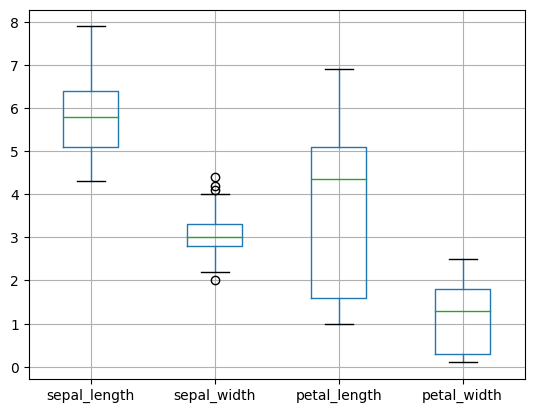

In [ ]:
df.boxplot()

#Types of species

<Axes: ylabel='species'>

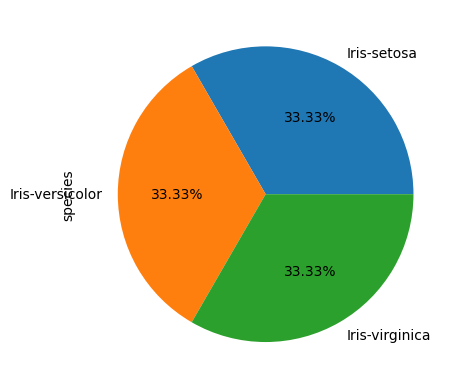

In [ ]:
df['species'].value_counts().plot(kind='pie',autopct='%1.2f%%')

columns :  sepal_length


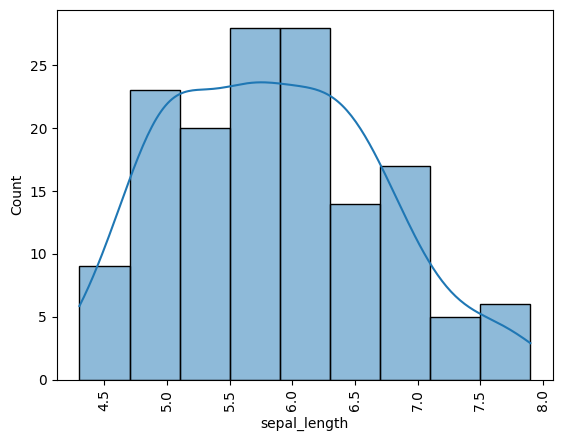

columns :  sepal_width


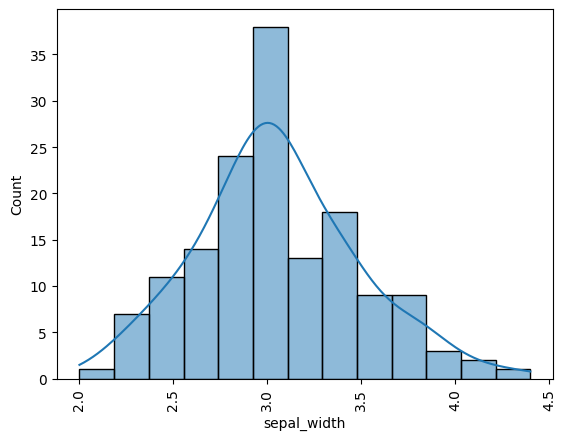

columns :  petal_length


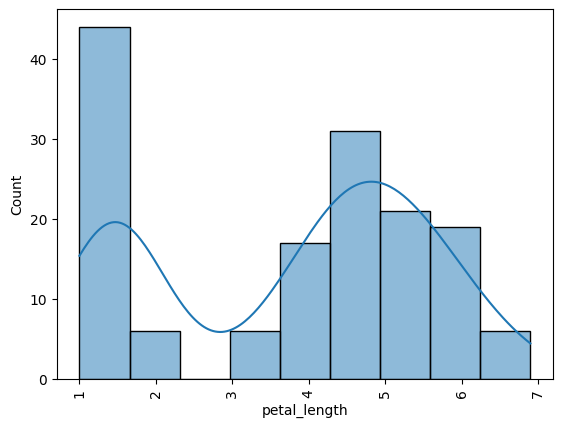

columns :  petal_width


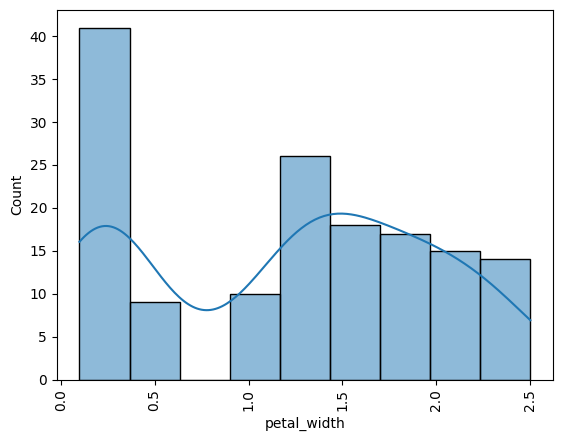

columns :  species


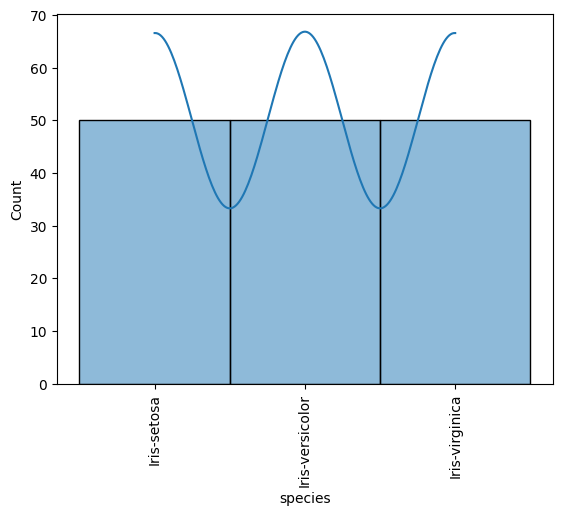

In [ ]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print('columns : ' , i )
    plt.xticks(rotation = 'vertical')
    plt.show()

<Axes: xlabel='sepal_length', ylabel='species'>

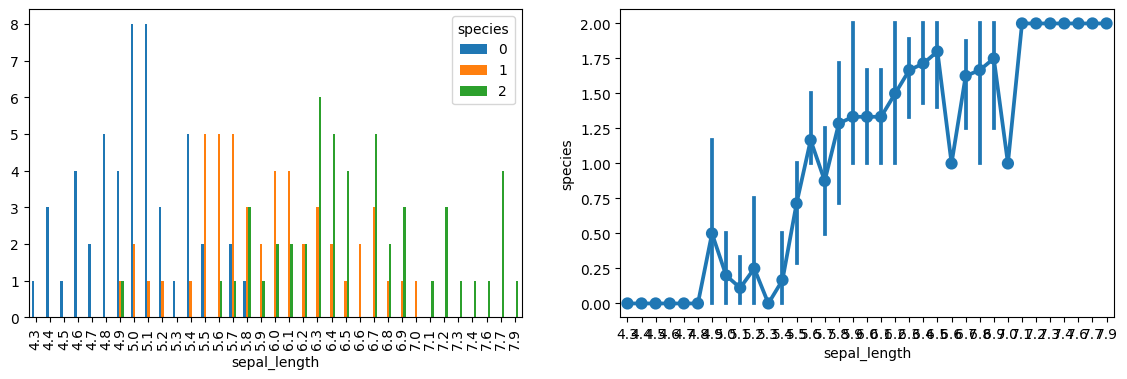

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.sepal_length,df.species).plot(kind="bar",ax=ax1)

sns.pointplot(
    x="sepal_length",
    y="species",
    data=df,ax=ax2)

<Axes: xlabel='sepal_width', ylabel='species'>

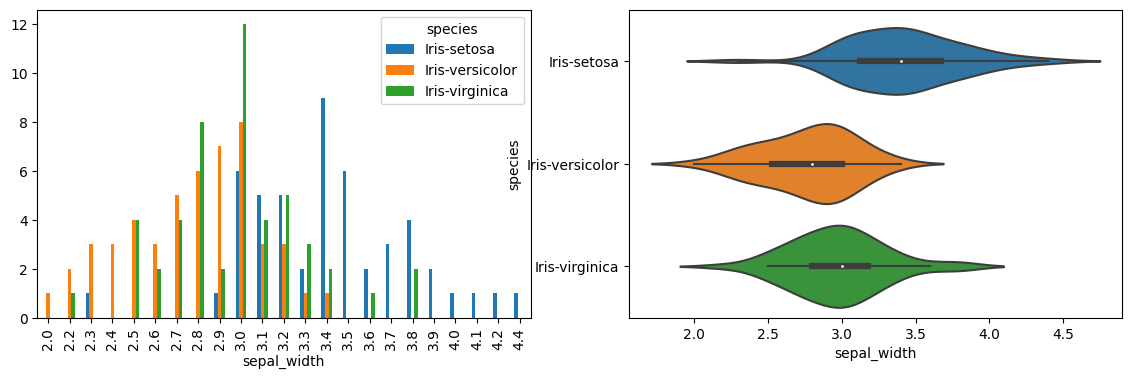

In [ ]:
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.sepal_width,df.species).plot(kind="bar",ax=ax1)

sns.violinplot(
    x="sepal_width",
    y="species",
    data=df,ax=ax2)

<Axes: xlabel='petal_length', ylabel='species'>

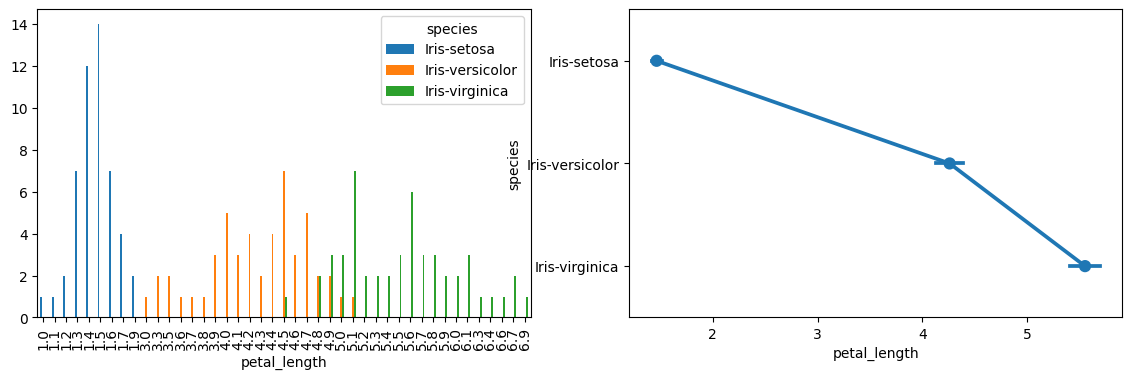

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.petal_length,df.species).plot(kind="bar",ax=ax1)

sns.pointplot(
    x="petal_length",
    y="species",
    data=df,ax=ax2)

<Axes: xlabel='petal_width', ylabel='species'>

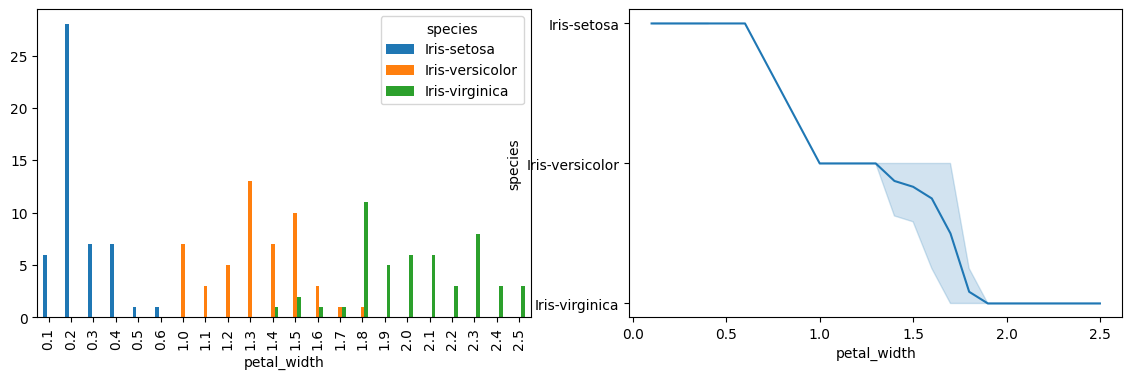

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.petal_width,df.species).plot(kind="bar",ax=ax1)

sns.lineplot(
    x="petal_width",
    y="species",
    data=df,ax=ax2)

#Encoding The Data

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [ ]:
encode(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#Train Test Split

In [ ]:
x=df.drop(["species"],axis=1)
y=df['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(30,)
(120,)


#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)
acc_report(y_test,preds_ytest_lr)
acc_report(y_train,preds_ytrain_lr)

accuracy:: 1.0
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy:: 0.98
[[37  0  0]
 [ 0 43  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#Decision tree Classifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dtc.fit(x_train,y_train)
preds_ytrain_dtc=dtc.predict(x_train)
preds_ytest_dtc=dtc.predict(x_test)
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 0.98
[[37  0  0]
 [ 0 44  0]
 [ 0  3 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        44
           2       1.00      0.92      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.98       120
weighted avg       0.98      0.97      0.97       120

accuracy:: 0.93
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

accuracy:: 0.97
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


#Gradientboosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

accuracy:: 0.97
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
preds_ytrain_knn=knn.predict(x_train)
preds_ytest_knn=knn.predict(x_test)
acc_report(y_train,preds_ytrain_knn)
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.98
[[37  0  0]
 [ 0 43  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

accuracy:: 0.97
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#Adaboosting Classifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train,y_train)
preds_ada_train=ada.predict(x_train)
preds_ada_test=ada.predict(x_test)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.96
[[37  0  0]
 [ 0 42  2]
 [ 0  3 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.95      0.94        44
           2       0.95      0.92      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

accuracy:: 0.9
[[13  0  0]
 [ 0  6  0]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30

